# Ruina del Jugador

Supongamos que dos jugadores, A y B, apuestan en los resultados de lanzamientos sucesivos de una moneda. En cada lanzamiento, si sale cara, A recibe 1 unidad de B, mientras que si sale cruz, A le paga 1 unidad a B. Continúan así hasta que uno de los dos se queda sin dinero. Si se supone que los lanzamientos de la moneda son independientes y que cada lanzamiento resulta en cara con probabilidad $𝑝$, ¿cuál es la probabilidad de que A termine con todo el dinero si comienza con $𝑖$ unidades y B comienza con $N-i$ unidades?

Si E es el evento que A gane si empieza con $i$ monedas, entonces

$$P_i := \mathbb{P}(E) = \begin{cases}\frac{1-(q / p)^i}{1-(q / p)^N} & \text { si } p \neq \frac{1}{2}\\ \frac{i}{N} & \text { si } p= \frac{1}{2}
\end{cases}$$

Esto se puede consultar en el libro [A first course in Probability](https://www.pearson.com/en-us/subject-catalog/p/first-course-in-probability-a/P200000006334/9780137504589) de Sheldon Ross en la página 87.

En este cuaderno analizaremos esta probabilidad y su sensibilidad a los parámetros $p$ e $i$.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

class Ruina1:

  # Definimos los datos iniciales
  def __init__(self, iter, p, N, i):
    self.i = i  # El capital inicial de A
    self.iter = iter # El número de iteraciones que queremos
    self.p = p # La proba de que A gane
    self.N = N # El monto máximo
    self.ganancias = [i]

  # Función para simular el experimento
  def simular(self):
    for i in range(1, self.iter):
      # Si A se queda en bancarrota o gana todo, termina el juego
      if self.ganancias[-1] == 0 or self.ganancias[-1] == self.N:
        self.ganancias.append(self.ganancias[-1])
        continue
      # Elige con las probabilidades definidas si subir o bajar
      b = np.random.choice([-1, 1], p=[1 - self.p, self.p])
      self.ganancias.append(self.ganancias[-1] + b)

    return True

  # Función para imprimir las ganancias
  def __str__(self):
    return str(self.ganancias)

  # Función para graficar las ganancias
  def plot(self):
    plt.style.use('seaborn-v0_8-dark')
    data = pd.DataFrame({'t': np.arange(1, self.iter + 1), 'c': self.ganancias})
    plt.figure(figsize=(7, 4))
    plt.plot(data['t'], data['c'], color='darkslategray', linewidth=1)
    plt.grid()
    plt.title(f'Ruina del Jugador con p = {self.p}', fontsize=16)
    plt.xlabel('Tiempo', fontsize=12)
    plt.ylabel('Valor del Proceso', fontsize=12)
    plt.show()

Veamos un ejemplo del experimento.

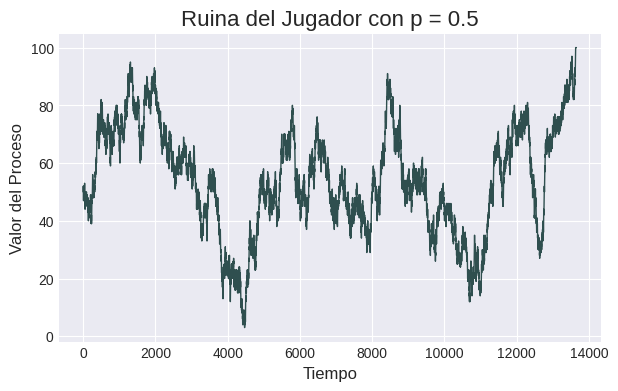

In [ ]:
np.random.seed(92) # Fijamos reproducibilidad
ruina2 = Ruina1(13650, 0.5, 100, 50) # Guardamos el objeto
ruina2.simular() # Simulamos el experimento
ruina2.plot() # Graficamos

In [ ]:
ganancias2 = ruina2.ganancias
ganancias2[-1]

np.int64(100)

En el mismo libro se demuestra que si $Q_i$ es el evento que el jugador B gane dado que A empezó con $i$, entonces $P_i + Q_i = 1$. ¡El juego siempre se termina!

Veamos cómo se ve esto en acción

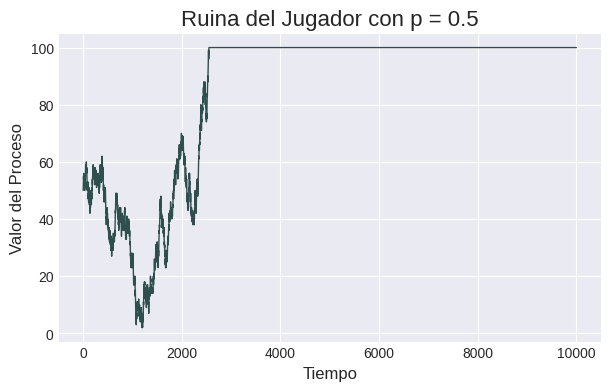

In [ ]:
ruina2 = Ruina1(10000, 0.5, 100, 50)
ruina2.simular()
ruina2.plot()

Ahora veremos cómo se comporta la probabilidad en este tipo de experimentos, viendo a $P_i$ como una función de $i$ y después de $P$

In [ ]:
# Definimos la función de la probabilidad de E
def u_k(p, N, i):
  if p == 0.5:
    return i/N
  else:
    q = 1-p
    num = 1- (q/p) ** i
    den = 1 - (q/p) ** N
    return num/den

# Definimos datos para cada valor de p que usaremos y usando N = 50
datos_uk = pd.DataFrame({'k': np.arange(0, 51), 'u_k1': [u_k(0.1, 50, k) for k in np.arange(0, 51)], 'u_k2': [u_k(0.3, 50, k) for k in np.arange(0, 51)]
                      , 'u_k3': [u_k(0.5, 50, k) for k in range(0, 51)], 'u_k4': [u_k(0.55, 10500, k) for k in np.arange(0, 51)], 'u_k5': [u_k(0.7, 50, k) for k in np.arange(0, 51)],
                         'u_k6': [u_k(0.9, 50, k) for k in range(0, 51)], 'u_k7': [u_k(0.45, 50, k) for k in range(0, 51)]})

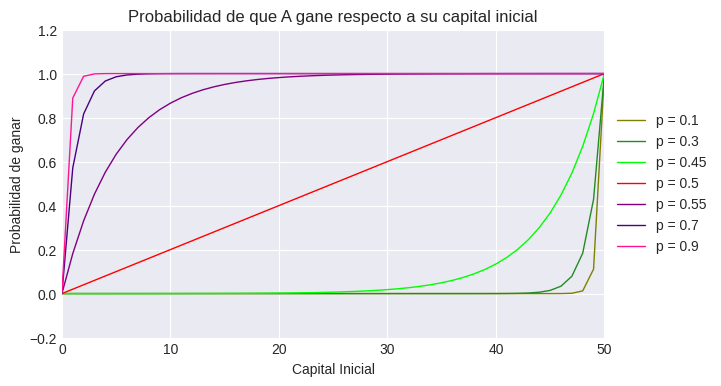

In [ ]:
# Graficamos los datos
plt.figure(figsize=(7, 4))
plt.plot(datos_uk['k'], datos_uk['u_k1'], color='olive', linewidth=1, label='p = 0.1')
plt.plot(datos_uk['k'], datos_uk['u_k2'], color='forestgreen', linewidth=1, label='p = 0.3')
plt.plot(datos_uk['k'], datos_uk['u_k7'], color='lime', linewidth=1, label='p = 0.45')
plt.plot(datos_uk['k'], datos_uk['u_k3'], color='red', linewidth=1, label='p = 0.5')
plt.plot(datos_uk['k'], datos_uk['u_k4'], color='purple', linewidth=1, label='p = 0.55')
plt.plot(datos_uk['k'], datos_uk['u_k5'], color='indigo', linewidth=1, label='p = 0.7')
plt.plot(datos_uk['k'], datos_uk['u_k6'], color ='deeppink', linewidth=1, label='p = 0.9')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Leyenda para diferenciar cada caso
plt.title('Probabilidad de que A gane respecto a su capital inicial') # Título del gráfico
plt.xlabel('Capital Inicial') # Leyenda del eje x
plt.ylabel('Probabilidad de ganar') # Leyenda del eje y
plt.style.use('seaborn-v0_8-dark')
plt.xlim(0, 50) # Límites del eje x
plt.ylim(-0.2, 1.2) # Límites del eje y
plt.grid()
plt.show()

Por otro lado, podemos graficar la probabilidad $P_i$ como una función de $p$ y notar cómo es su comportamiento.

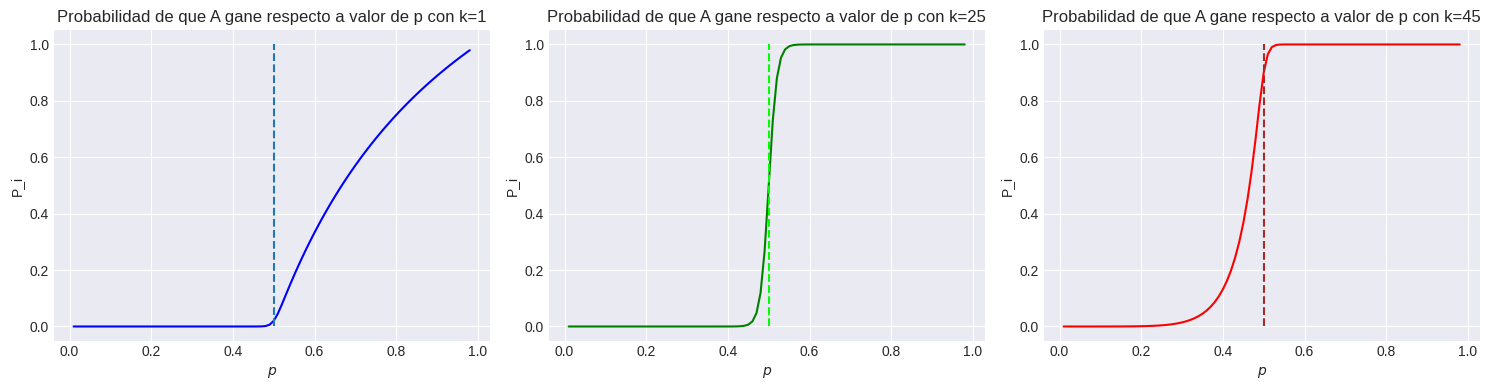

In [ ]:
datos_uk2 = pd.DataFrame({'p': np.linspace(0.01, 0.98, 98), 'u_k1': [u_k(p, 50, 1) for p in np.linspace(0.01, 0.98, 98)], 'u_k2': [u_k(p, 50, 25) for p in np.linspace(0.01, 0.98, 98)],
            'u_k3': [u_k(p, 50, 45) for p in np.linspace(0.01, 0.98, 98)]})

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # Hacemos una matriz de 1x3 de gráficos

# Primer subplot
axes[0].plot(datos_uk2['p'], datos_uk2['u_k1'], color='blue')
axes[0].set_title('Probabilidad de que A gane respecto a valor de p con k=1')
axes[0].set_xlabel(r'$p$')
axes[0].set_ylabel(r'P_i')
axes[0].plot([0.5 for _ in range(100)], [i for i in np.linspace(0,1,100)], '--') # Línea vertical
axes[0].grid()

# Segundo subplot
axes[1].plot(datos_uk2['p'], datos_uk2['u_k2'], color='green')
axes[1].set_title('Probabilidad de que A gane respecto a valor de p con k=25')
axes[1].set_xlabel(r'$p$')
axes[1].set_ylabel(r'P_i')
axes[1].plot([0.5 for _ in range(100)], [i for i in np.linspace(0,1,100)], '--', color='lime') # Línea vertical
axes[1].grid()

# Tercer subplot
axes[2].plot(datos_uk2['p'], datos_uk2['u_k3'], color='red')
axes[2].set_title('Probabilidad de que A gane respecto a valor de p con k=45')
axes[2].set_xlabel(r'$p$')
axes[2].set_ylabel(r'P_i')
axes[2].plot([0.5 for _ in range(100)], [i for i in np.linspace(0,1,100)], '--', color = 'brown') # Línea vertical
axes[2].grid()

plt.tight_layout()
plt.show()